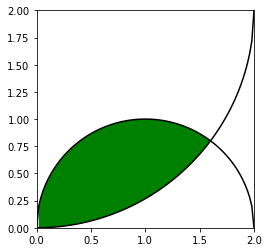

Calculate the area shaded in green


In [2]:
#Monte Carlo Integration Technique

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()
print('Calculate the area shaded in green')

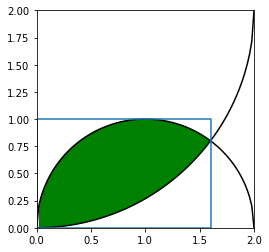

In [3]:
#Draw a rectangle to cover the area I want to integrate over
#Calculate area of that rectangle
#Generate a large number of random points in rectangle
#Check each point if it is under the curve

from random import random

def f(x):
    return np.sqrt(1-(x-1)**2)

def g(x):
    return 2-np.sqrt(4-x**2)

def Monte_Carlo(N):
    '''
    Function to perform Monte Carlo integral using N random
    points
    '''
    A = 1.6*1    #area of rectangle
    k = 0        #keep track of number of points between curves
    for i in range(N):
        '''This is to get N points in rectangle'''
        x = A*random()
        y = random()
        if y<f(x) and y>g(x):
            k += 1
    I = k*A/N    #Calculate the integral
    return I

#Plot the area to be calculated
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

#Plot boundary of the rectangle
plt.plot([0,0,1.6,1.6,0],[0,1,1,0,0])
plt.show()

In [4]:
Monte_Carlo(100)

1.008

In [5]:
Monte_Carlo(1000)

0.9488000000000001

In [6]:
Monte_Carlo(1000000)

0.9627808

In [ ]:
'''
We can see that the integral is converging around the value of 0.96
'''

In [7]:
#calculate standard variance
from cmath import sqrt

def standard_var(N):
    '''
    function to calculate the standard variance from Monte Carlo
    calculation
    '''
    A = 1.6*1
    I = Monte_Carlo(N)
    p = I/A
    delta = sqrt((p-p**2)/N)
    return delta

In [8]:
standard_var(10000)

(0.004906190375433877+0j)

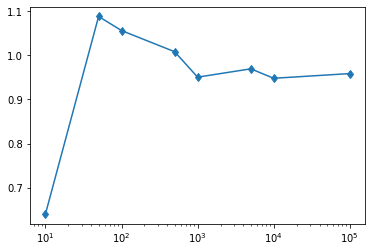

In [13]:
#Lets plot the variance

x = [1e+1, 5e+1, 1e+2, 5e+2, 1e+3, 5e+3, 1e+4, 1e+5]
y = []
for i in x:
    y.append(Monte_Carlo(int(i)))
plt.plot(x, y, '-d')
plt.xscale('log')
plt.show()

In [ ]:
'''
So we can see that the values converge to about 0.96
and the more random numbers we choose the more it converges
'''